<a href="https://colab.research.google.com/github/lauraosede/CE888/blob/main/lab_2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [ ]:
df.head

<bound method NDFrame.head of     Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0>

In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
  # <---INSERT YOUR CODE HERE--->
  #calculating mean of the array
  data_mean = np.mean(x)
  #caluclate the mean from each bootstrap and store it
  n_bootstraps_values = []
  for i in range(n_bootstraps):
    resample = np.random.choice(x, size = None, replace = True, p = None )
    sample_mean = np.mean(resample)
    n_bootstraps_values.append(sample_mean)
    #calculate the lower and upper bounds for a 95% CI
    CI = np.percentile(x, [5,95])
    lower = CI[0]
    upper = CI[1]
  return data_mean, lower, upper


	


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


     Bootstrap Iterations       Mean  Value
0                     100   9.214286   mean
1                     100   2.000000  lower
2                     100  20.700000  upper
3                    1100   9.214286   mean
4                    1100   2.000000  lower
..                    ...        ...    ...
145                 48100   2.000000  lower
146                 48100  20.700000  upper
147                 49100   9.214286   mean
148                 49100   2.000000  lower
149                 49100  20.700000  upper

[150 rows x 3 columns]


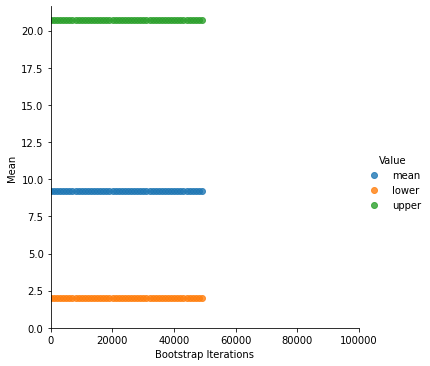

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)
print(df_boot)


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  #calculating mean of the array
  data_mean = np.mean(sample)
  #caluclate the mean from each bootstrap and store it
  n_bootstraps_values = []
  for i in range(n_bootstraps):
    resample = np.random.choice(sample, size = None, replace = True, p = None )
    sample_mean = np.mean(resample)
    n_bootstraps_values.append(sample_mean)
    #calculate the lower and upper bounds for a confidence interval passed as parameter
    confidence_interval = np.percentile(sample, [100-ci,ci])
    lower = confidence_interval[0]
    upper = confidence_interval[1]
  return data_mean, lower, upper

In [ ]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  #calculating std of the array
  data_std = np.std(sample)
  #caluclate the mean from each bootstrap and store it
  n_bootstraps_values = []
  for i in range(n_bootstraps):
    resample = np.random.choice(sample, size = None, replace = True, p = None )
    sample_std = np.std(resample)
    n_bootstraps_values.append(sample_std)
    #calculate the lower and upper bounds for a confidence interval passed as parameter
    confidence_interval = np.percentile(sample, [100-ci,ci])
    lower = confidence_interval[0]
    upper = confidence_interval[1]
  return data_std, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


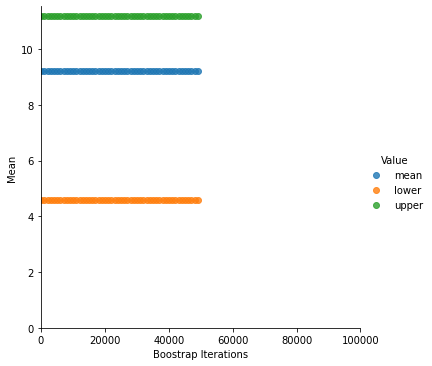

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section
# "Load individual files directly from GitHub")
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind 
#when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
df_vehicle = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
for i in range(248):
  x_axis = i
df_vehicle['X_axis']= x_axis
# Note: you can add more cells as needed to organise your code and your plots


In [ ]:
df_vehicle.head()



,Current fleet,New Fleet,X_axis
0,18,24.0,247
1,15,27.0,247
2,18,27.0,247
3,16,25.0,247
4,17,31.0,247


In [ ]:
sns.set(style='whitegrid')
sns.scatterplot(data = df_vehicle, x=None, y= "Current Fleet" )
plt.show()


ValueError: ignored

In [ ]:
#seperating old fleet and new fleet into two different data sets
old_fleet = df_vehicle['Current fleet'].tolist()
new_fleet = df_vehicle['New Fleet'].dropna().tolist()


In [ ]:
#creating scatter plot for old fleet and new fleet
sns.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=old_fleet, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
# <---INSERT YOUR CODE HERE--->
#getting the 95% CI of the mean of the current fleet using bootstrap function
#size of old fleet
size_old_fleet = len(old_fleet)
old_fleet_ci = bootstrap_mean_ci(old_fleet, size_old_fleet, 10000, 95)
print("95% confidence interval for old fleet is: " + str(old_fleet_ci))

#getting a 95% CI of the mean of new fleet using bootstrap function
#size of new fleet
size_new_fleet = len(new_fleet) 
new_fleet_ci = bootstrap_mean_ci(new_fleet, size_new_fleet, 10000, 95)
print("95% confidence interval for new fleet is: " + str(new_fleet_ci))

new_fleet_ci = bootstrap_mean_ci(new_fleet, size_new_fleet, 10000, 80)
print("80% confidence interval for new fleet is: " + str(new_fleet_ci))


new_fleet_ci = bootstrap_mean_ci(new_fleet, size_new_fleet, 10000, 92)
print("92% confidence interval for new fleet is: " + str(new_fleet_ci))





95% confidence interval for old fleet is: (20.14457831325301, 12.4, 34.0)
95% confidence interval for new fleet is: (30.481012658227847, 20.0, 39.0)
80% confidence interval for new fleet is: (30.481012658227847, 24.0, 35.400000000000006)
92% confidence interval for new fleet is: (30.481012658227847, 22.0, 38.0)


In [ ]:
#73% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations
old_fleet_std_ci =bootstrap_std_ci(old_fleet, size_old_fleet, 10000, 73)
print("72% confidence interval for std old fleet is: "+ str(old_fleet_std_ci))

72% confidence interval for std old fleet is: (6.401805462179708, 15.0, 24.0)


In [ ]:
#95% confidence interval for the standard deviation of the customers dataset using 10000 iterations 
#reading out data from column
df_customer = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv")
df_customer.head()

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0


In [ ]:
customer_data = df_customer.values.T[1]
size_customer_data = len(customer_data)
customer_data_std_ci =bootstrap_std_ci(customer_data, size_customer_data, 10000, 95)

print("95% confidence interval for std old fleet is: "+ str(customer_data_std_ci))

95% confidence interval for std old fleet is: (5.684296305594556, 2.0, 20.7)


### permutation test


In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    #observed value
    sample1_mean = np.mean(sample1)
    sample2_mean = np.mean(sample2)
    t_obs = sample2_mean - sample1_mean

    #permutated value
    #concat two samples
    concat = np.concatenate((sample1, sample2))
    #permutate concat df randomly
    perm = []
    count = 0
    for i in range(n_permutations):
      permutated_data = np.random.permutation(concat)
      #spliting permutated data set into two halfs
      length = len(permutated_data)
      pold = permutated_data[:int(length/2)]
      pnew = permutated_data[int(length/2):]
      mean_old = np.mean(pold)
      mean_new = np.mean(pnew)
      test = mean_old - mean_new
      if test > t_obs:
        count = count +1
        
      #find p-value
      #divide count by number of permutations
      pvalue = count/n_permutations
    return pvalue

In [ ]:
#comparing the results of the two means
comp = permut_test(old_fleet, new_fleet, 3000)
print("The p value is : " + str(comp))


The p value is : 0.0


In [ ]:
#working on voting data set
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 
                40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43,
                56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37,
                40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]

dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 
                38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 
                29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 
                48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 
                39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 
                49.58, 41.97, 38.11]

In [ ]:
#size of voting dataset
size_pa = len(dem_share_PA)
print(size_pa)
size_oh = len(dem_share_OH)
print(size_oh)

67
88


In [ ]:
#90% confidence intervals for the means of the votes using 25000 bootstraps
dem_share_PA_ci = bootstrap_mean_ci(dem_share_PA, size_pa, 25000, 90)
print('The 90% ci is for PA voters is : '+ str(dem_share_PA_ci))

dem_share_OH_ci = bootstrap_mean_ci(dem_share_OH, size_oh, 25000, 90)
print('The 90% ci is for OH voters is : '+ str(dem_share_OH_ci))

The 90% ci is for PA voters is : (45.476417910447765, 34.328, 57.83800000000001)
The 90% ci is for OH voters is : (44.31818181818182, 33.878, 56.961)


In [ ]:
#p-value from a permutation test with 20000 permutations
p_vote = permut_test(dem_share_PA, dem_share_OH, 20000)
print("Gender voting p value : " + str(p_vote))


Gender voting p value : 0.7671


In [ ]:
#p-value from a permutation test with 20000 permutations
p_vote = permut_test(dem_share_OH,dem_share_PA, 20000)
print("Gender voting p value : " + str(p_vote))


Gender voting p value : 0.23845
